## Imports

In [14]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Import the data
df_can = pd.read_pickle('../data/interim/immigration_to_canada_01.pkl', )
df_can.head()

,country,continent,region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [3]:
# Create a 'years' list that will help with plots
years = list(range(1980, 2014))

## Pie Charts

Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

In [4]:
total_immigration_by_continent = df_can[['continent', 'total']].groupby(by='continent').sum()
total_immigration_by_continent

,total
continent,
Africa,618948
Asia,3317794
Europe,1410947
Latin America and the Caribbean,765148
Northern America,241142
Oceania,55174


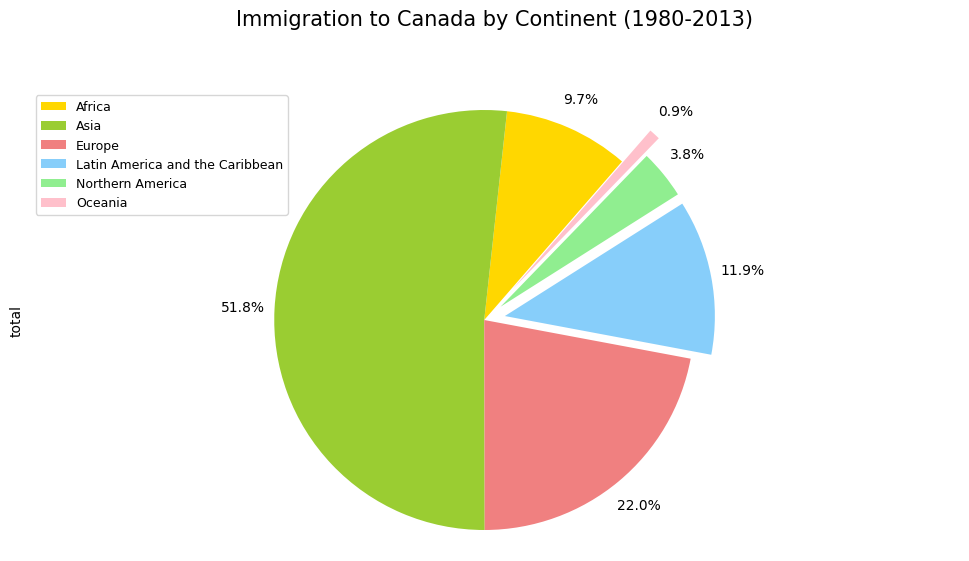

In [5]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2]

plt.figure(figsize=(12, 6))
total_immigration_by_continent['total'].plot(kind='pie', autopct='%1.1f%%', startangle=49, shadow=False, labels=None, pctdistance=1.15, colors=colors_list, explode=explode_list)
plt.title('Immigration to Canada by Continent (1980-2013)', y=1.12, fontsize=15)
plt.legend(labels=total_immigration_by_continent.index, loc='upper left', fontsize=9)
plt.axis('equal')
plt.show()

## Box Plots
Let's plot the box plot for the Japanese immigrants between 1980 - 2013.


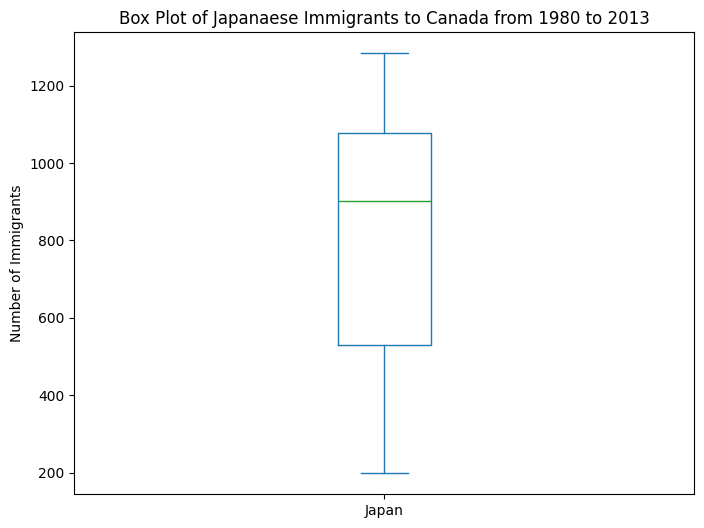

In [6]:
from_japan = df_can[df_can['country']== 'Japan'].set_index('country')[years].transpose()

from_japan.plot(kind='box', figsize=(8, 6))
plt.title('Box Plot of Japanaese Immigrants to Canada from 1980 to 2013')
plt.ylabel('Number of Immigrants')
plt.show()

Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

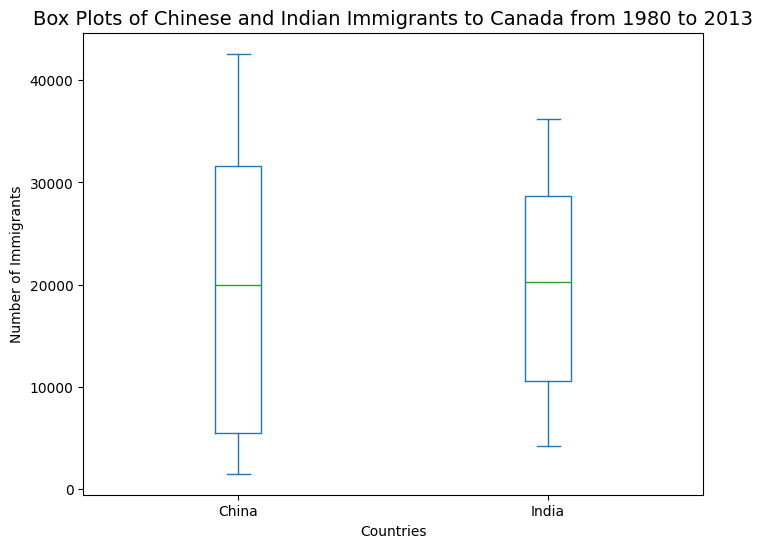

In [7]:
from_china_and_india = df_can.set_index('country').loc[['China', 'India']][years].transpose()

from_china_and_india.plot(kind='box', figsize=(8, 6))
plt.title("Box Plots of Chinese and Indian Immigrants to Canada from 1980 to 2013", fontsize=14)
plt.xlabel("Countries")
plt.ylabel('Number of Immigrants')
plt.show()

## Subplots
Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a `figure` (overall canvas) and divide it into `subplots`, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**.

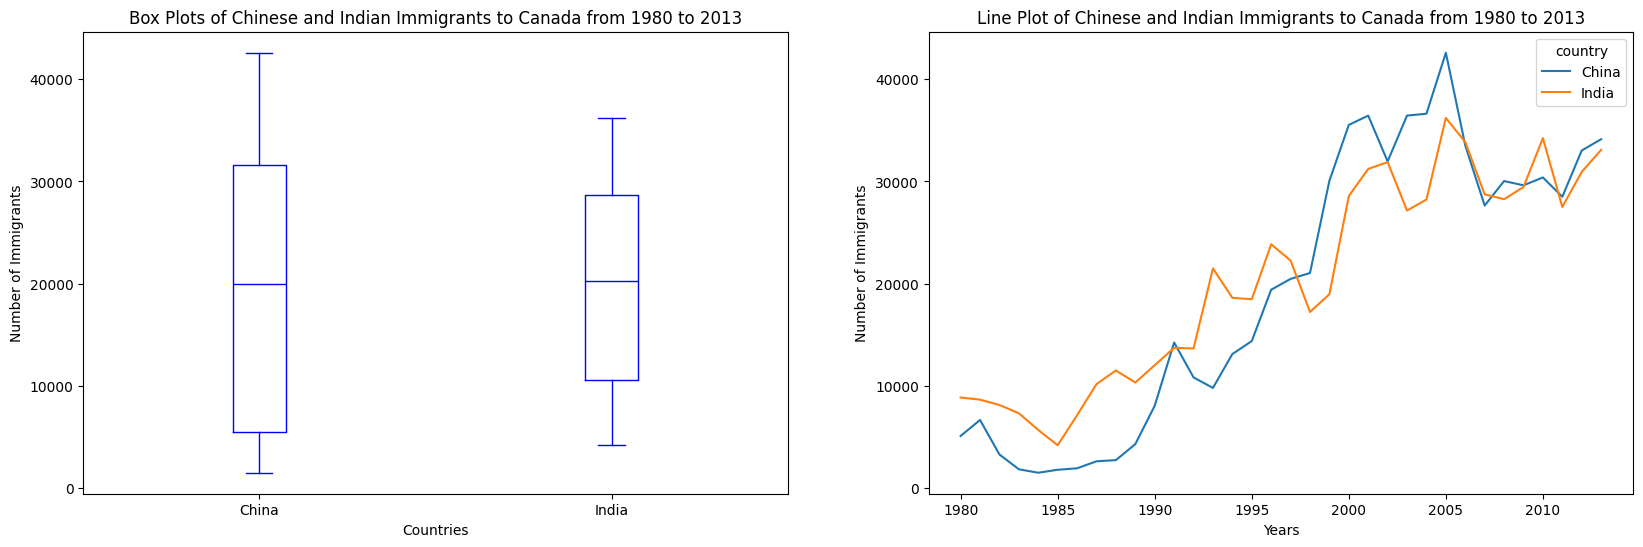

In [8]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # (nrows, ncols, plot_number)
ax1 = fig.add_subplot(1, 2, 2) 

from_china_and_india.plot(kind='box', color='blue', figsize=(20, 6), ax=ax0)
ax0.set_title('Box Plots of Chinese and Indian Immigrants to Canada from 1980 to 2013')
ax0.set_xlabel("Countries")
ax0.set_ylabel('Number of Immigrants')

from_china_and_india.plot(kind='line', ax=ax1)
ax1.set_title('Line Plot of Chinese and Indian Immigrants to Canada from 1980 to 2013')
ax1.set_xlabel("Years")
ax1.set_ylabel('Number of Immigrants')

plt.show()





Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the *decades* `1980s`, `1990s`, and `2000s`.

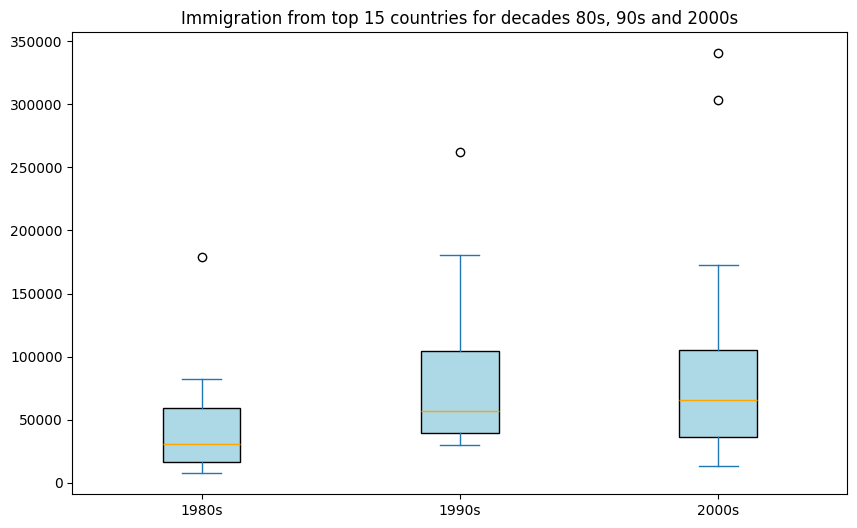

In [9]:
years_80s = list(range(1980,1990))
years_90s = list(range(1990,2000))
years_00s = list(range(2000,2010))

top_15 = df_can.sort_values(by='total', ascending=False).head(15).set_index('country')
eighties = top_15.loc[:, years_80s].sum(axis=1)
nineties = top_15.loc[:, years_90s].sum(axis=1)
two_thousands = top_15.loc[:, years_00s].sum(axis=1)

top_15_by_decade = pd.DataFrame(
    {
        '1980s': eighties,
        '1990s': nineties,
        '2000s': two_thousands
    })

top_15_by_decade.plot(kind='box', figsize=(10, 6), patch_artist=True, medianprops={'color': 'orange'}, boxprops={'facecolor': 'lightblue', 'edgecolor': 'black'})
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.show()


In [10]:
top_15_by_decade.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


In [11]:
q1_2000s = 36101.50
q3_2000s =  105505.50
iqr_2000s = q3_2000s - q1_2000s

is_outlier = (top_15_by_decade['2000s'] > q3_2000s + 1.5 * iqr_2000s) | (top_15_by_decade['2000s'] < q1_2000s - 1.5 * iqr_2000s) 
is_outlier.sum()

np.int64(2)

## Scatter Plots

Using a scatter plot, let's visualize the trend of total immigration to Canada (all countries combined) for the years 1980 - 2013.

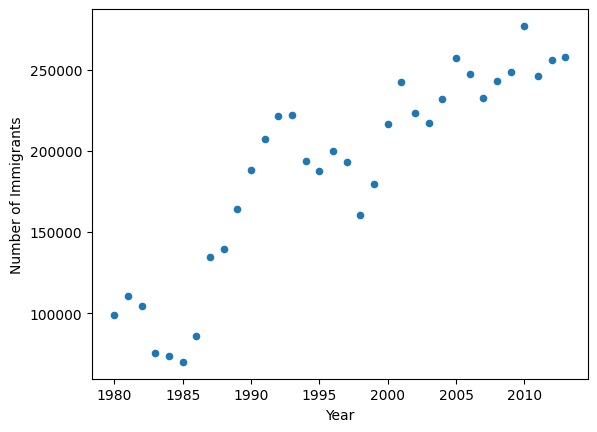

In [12]:
immigration_per_year = df_can[years]
immigration_per_year = immigration_per_year.sum(axis=0).to_frame().reset_index()

immigration_per_year.columns = ['year', 'total']

immigration_per_year.plot(kind='scatter', x='year', y='total')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

Let's add the linear line of best fit:

In [28]:
x = immigration_per_year['year']
y= immigration_per_year['total']

slope, intercept = np.polyfit(x, y, deg=1)

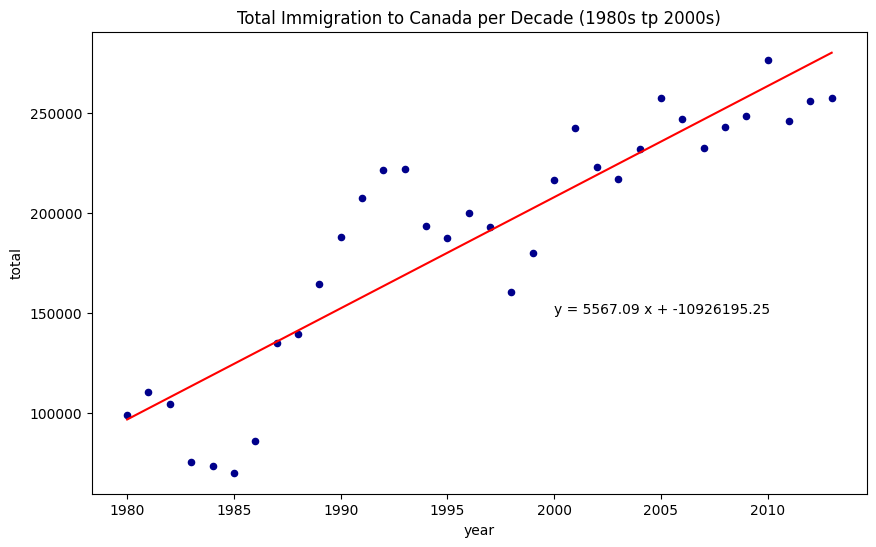

In [27]:
immigration_per_year.plot(kind='scatter', x='year', y='total', figsize=(10,6), color='darkblue')

plt.title('Total Immigration to Canada per Decade (1980s tp 2000s)')
plt.plot(x, slope * x + intercept, color='red') # y = x * a + b // formula for the linear regression
plt.annotate(f'y = {slope:.2f} x + {intercept:.2f}', xy=(2000, 150000))

plt.show()

Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

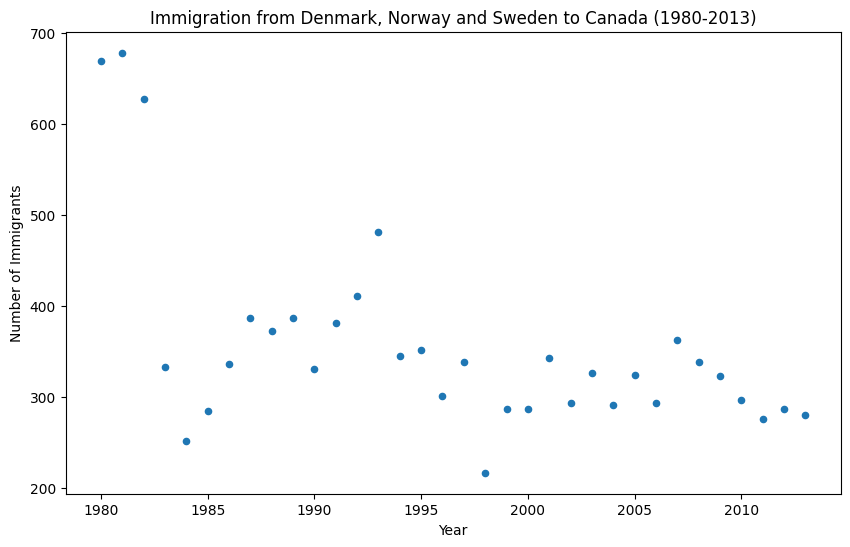

In [62]:
df_nordic = df_can.set_index('country').loc[['Denmark', 'Norway', 'Sweden']][years].transpose()
df_nordic = df_nordic.sum(axis=1).to_frame().reset_index()
df_nordic.columns = ['year', 'total']

df_nordic.plot(kind='scatter', x='year', y='total', figsize=(10, 6))
plt.title('Immigration from Denmark, Norway and Sweden to Canada (1980-2013)')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

## Bubble Plots
A `bubble plot` is a variation of the `scatter plot` that displays three dimensions of data (x, y, z). The data points are replaced with bubbles, and the size of the bubble is determined by the third variable `z`, also known as the weight. In `maplotlib`, we can pass in an array or scalar to the parameter `s` to `plot()`, that contains the weight of each point.

**Let's start by analyzing the effect of Argentina's great depression**.

Argentina suffered a great depression from 1998 to 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbor Brazil. Let's do that using a `bubble plot` of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the *normalized* value of the population for each year.

In [116]:
df_arg_bra = df_can.set_index('country').loc[['Argentina', 'Brazil']][years].transpose()
df_arg_bra.index.name = 'Year'
df_arg_bra = df_arg_bra.reset_index()

df_arg_bra['norm_Argentina'] = (df_arg_bra['Argentina'] - df_arg_bra['Argentina'].min()) / (df_arg_bra['Argentina'].max() - df_arg_bra['Argentina'].min()) * 2000 + 10

df_arg_bra['norm_Brazil'] = (df_arg_bra['Brazil'] - df_arg_bra['Brazil'].min()) / (df_arg_bra['Brazil'].max() - df_arg_bra['Brazil'].min())  * 2000 + 10

df_arg_bra.head()


country,Year,Argentina,Brazil,norm_Argentina,norm_Brazil
0,1980,368,211,232.078760,75.640194
1,1981,426,220,306.965784,82.933549
2,1982,626,192,565.196901,60.243112
3,1983,241,139,68.102001,17.293355
4,1984,237,145,62.937379,22.155592


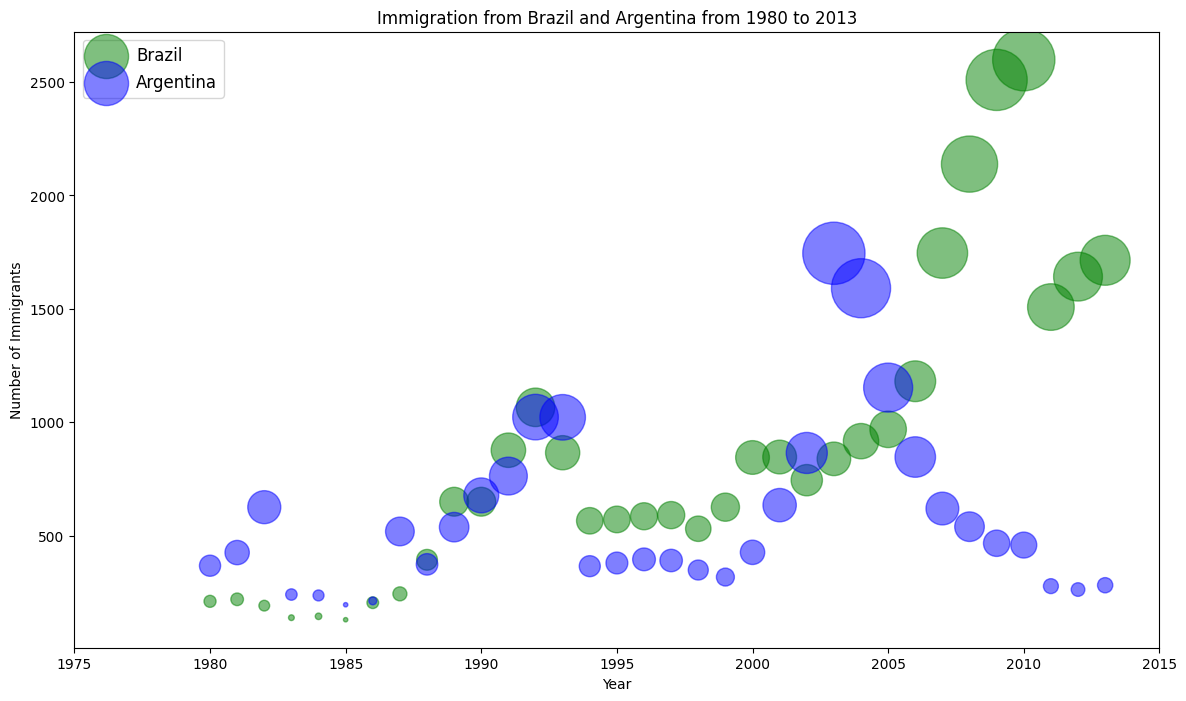

In [121]:
ax0 = df_arg_bra.plot(kind='scatter', x='Year', y='Brazil', s='norm_Brazil', figsize=(14,8), alpha=0.5, color='green', xlim=(1975, 2015))
ax1 = df_arg_bra.plot(kind='scatter', x='Year', y='Argentina', s='norm_Argentina', alpha=0.5, color='blue', ax=ax0)

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize=12)
plt.show()

Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_can_t** that we defined and used in the previous example.

In [141]:
df_chn_ind = df_can.set_index('country').loc[['China', 'India']][years].transpose().reset_index()
df_chn_ind.columns = ['Year', 'China', 'India']

df_chn_ind['norm_chn_bubble'] = (df_chn_ind['China'] - df_chn_ind['China'].min() ) / (df_chn_ind['China'].max() - df_chn_ind['China'].min()) * 2000 + 10

df_chn_ind['norm_ind_bubble'] = (df_chn_ind['India'] - df_chn_ind['India'].min() ) / (df_chn_ind['India'].max() - df_chn_ind['India'].min()) * 2000 + 10

df_chn_ind.head()

,Year,China,India,norm_chn_bubble,norm_ind_bubble
0,1980,5123,8880,185.171104,301.821619
1,1981,6682,8670,261.114305,288.696209
2,1982,3308,8147,96.757435,256.007688
3,1983,1863,7338,26.367489,205.443608
4,1984,1527,5704,10.000000,103.315416


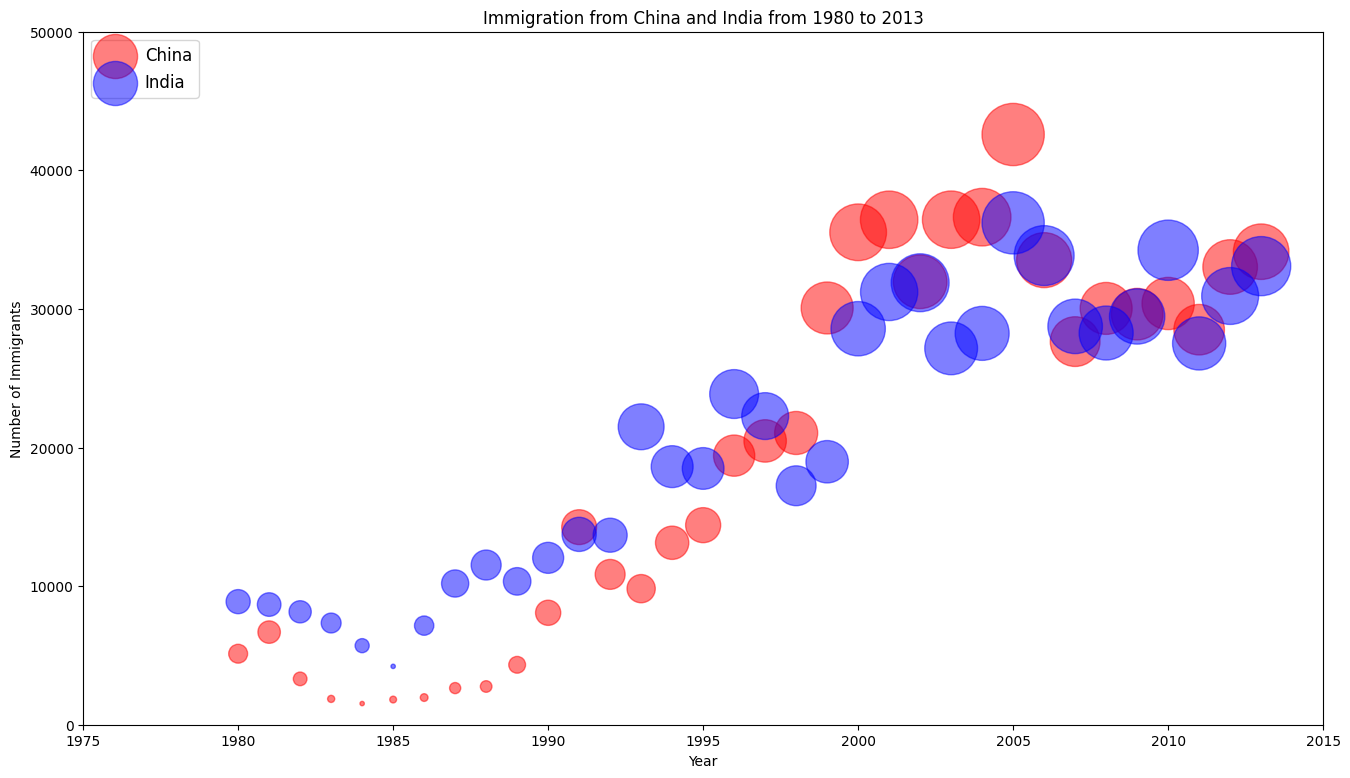

In [153]:
ax0 = df_chn_ind.plot(kind='scatter', x='Year', y='China', s='norm_chn_bubble', alpha=0.5, color='red', figsize=(16, 9), xlim=(1975, 2015), ylim=(0, 50000))
ax1 = df_chn_ind.plot(kind='scatter', x='Year', y='India', s='norm_ind_bubble', alpha=0.5, color='blue', ax=ax0)

ax0.set_title('Immigration from China and India from 1980 to 2013')
ax0.set_ylabel('Number of Immigrants')
ax0.legend(['China', 'India'], loc='upper left', fontsize=12)

plt.show()
